Mean Squared Error: 45.48437093689879
R-squared: 0.9415859216818113


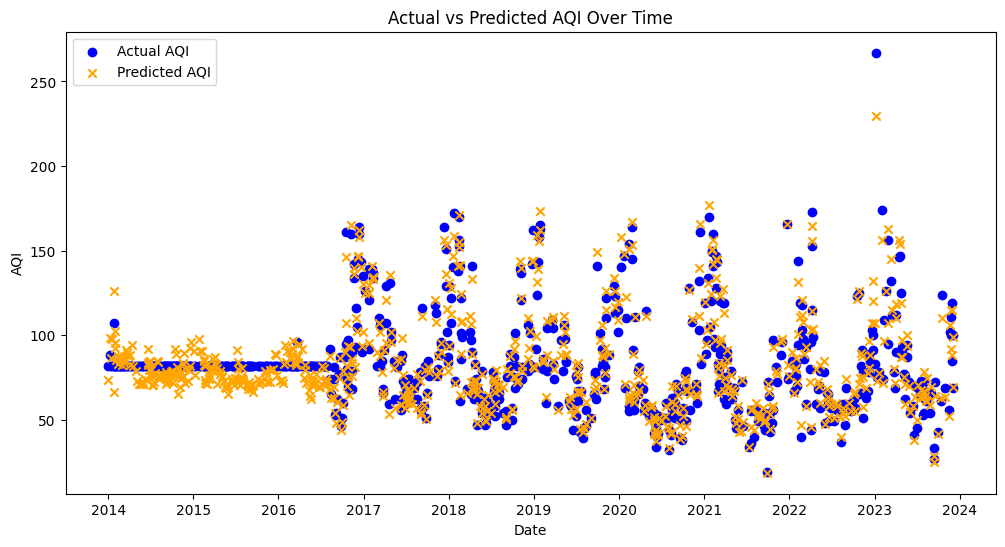

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/output_file_AQI2.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Split the dataset into features (X) and target variable (y)
X = data[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']]
y = data['AQI']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame with date as the index
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Create a DataFrame for better visualization
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index)

# Visualize the time series of Actual vs Predicted AQI with dots
plt.figure(figsize=(12, 6))
plt.scatter(results.index, results['Actual'], label='Actual AQI', color='blue', marker='o')
plt.scatter(results.index, results['Predicted'], label='Predicted AQI', color='orange', marker='x')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI Over Time')
plt.legend()
plt.show()


In [ ]:
# Define a tolerance level
tolerance = 5

# Calculate the percentage of predictions within the tolerance
within_tolerance = results[abs(results['Actual'] - results['Predicted']) <= tolerance]
accuracy = len(within_tolerance) / len(results) * 100

print(f'Accuracy within ±{tolerance} AQI: {accuracy:.2f}%')


Accuracy within ±5 AQI: 59.72%
